# Chi-Square Independence Test
1. Define  your null hypothesis and alternate hypothesis
2. State your alpha
3. Find your degrees of freedom
4. State the decision Rule
5. Calculate the Chi-Square Statistic
6. Find the critical value
7. State results and conclusion


In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Placement_Data.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [5]:
df.shape

(215, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [17]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [18]:
df['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [8]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<Axes: ylabel='Frequency'>

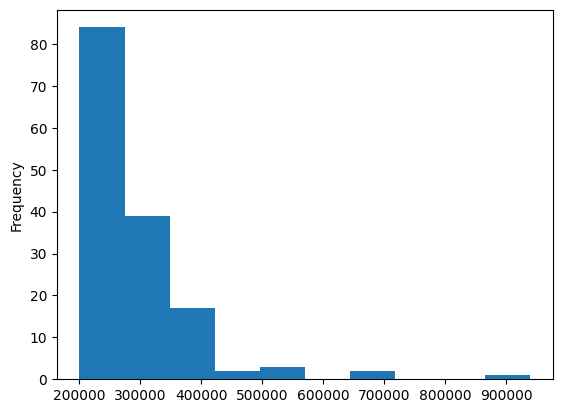

In [10]:
df['salary'].plot(kind='hist')

In [11]:
df['salary'].describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

In [14]:
df['salary'].fillna(df['salary'].median(),inplace=True)

In [15]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# Define Null and alternate Hypothesis
Null Hypothesis (Ho): There is no relationship between two categorical variables

Alternate Hypothesis (H1): There is a relationship between two categorical variables

In [19]:
df_crosstab = pd.crosstab(df['specialisation'],df['status'])

In [20]:
df_crosstab

status,Not Placed,Placed
specialisation,,
Mkt&Fin,25,95
Mkt&HR,42,53


In [21]:
df_crosstab.values


array([[25, 95],
       [42, 53]])

In [22]:
observed_values = df_crosstab.values
print(f'Observed Values :{observed_values}')

Observed Values :[[25 95]
 [42 53]]
